# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_1")
network_file = os.path.join(network_path, "network-synapses-minimal.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_1-A.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_1-A.hdf5")
duration = 18

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


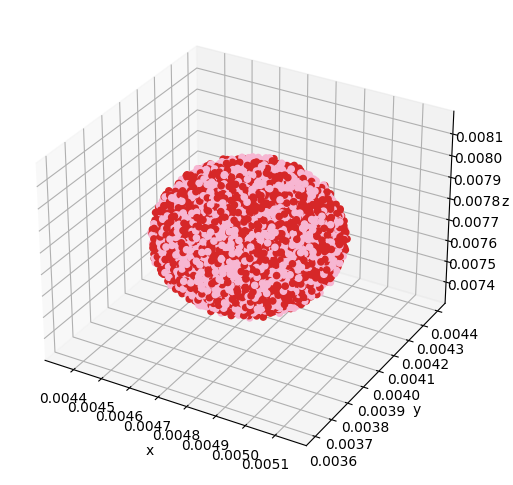

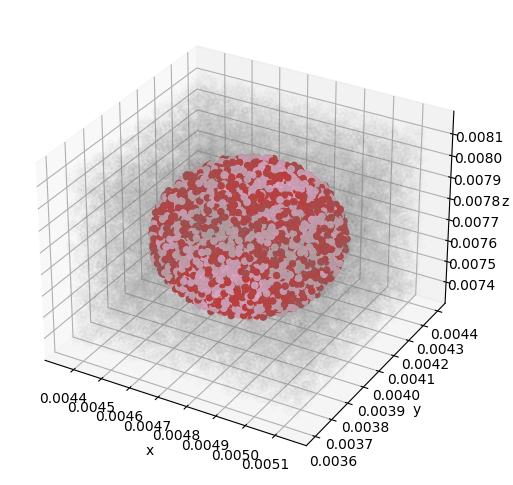

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


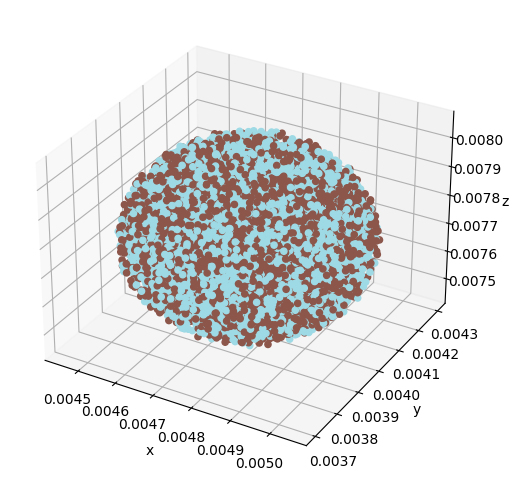

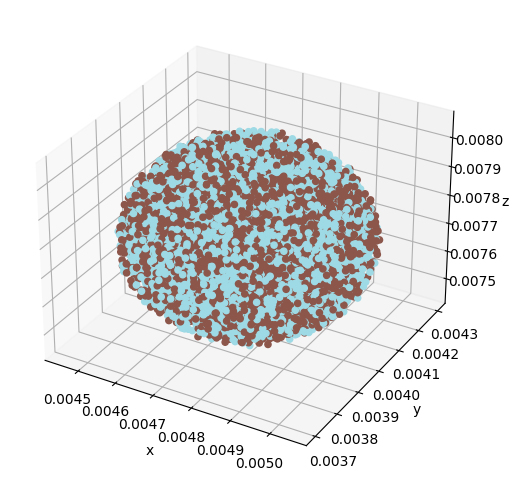

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

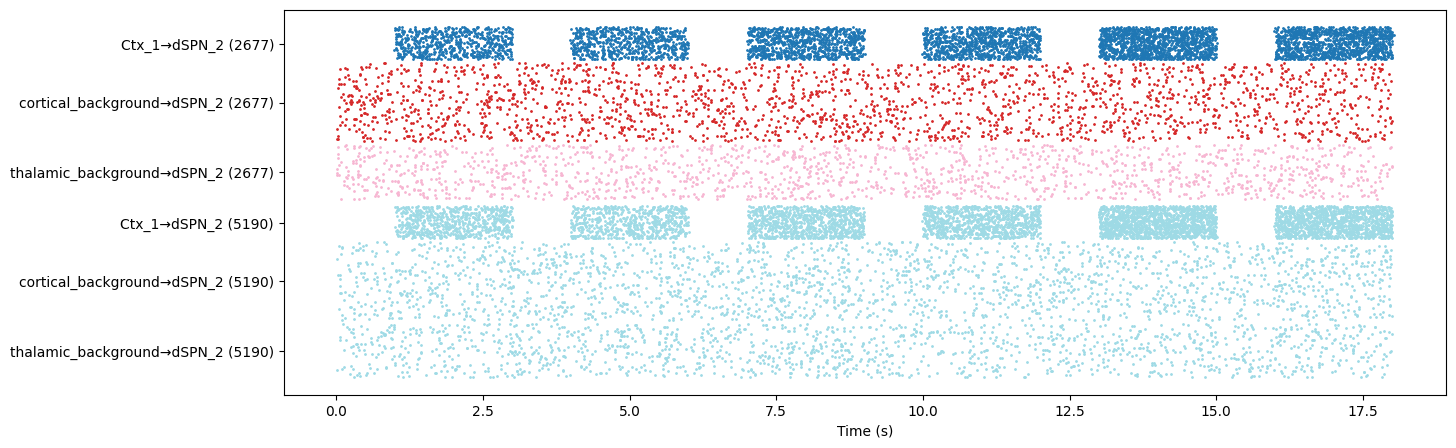

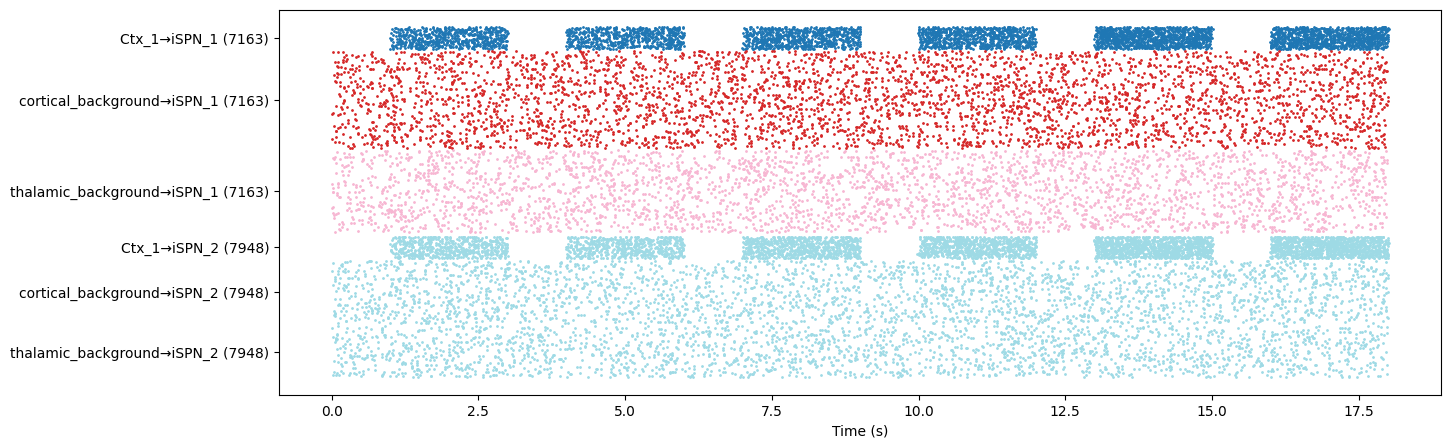

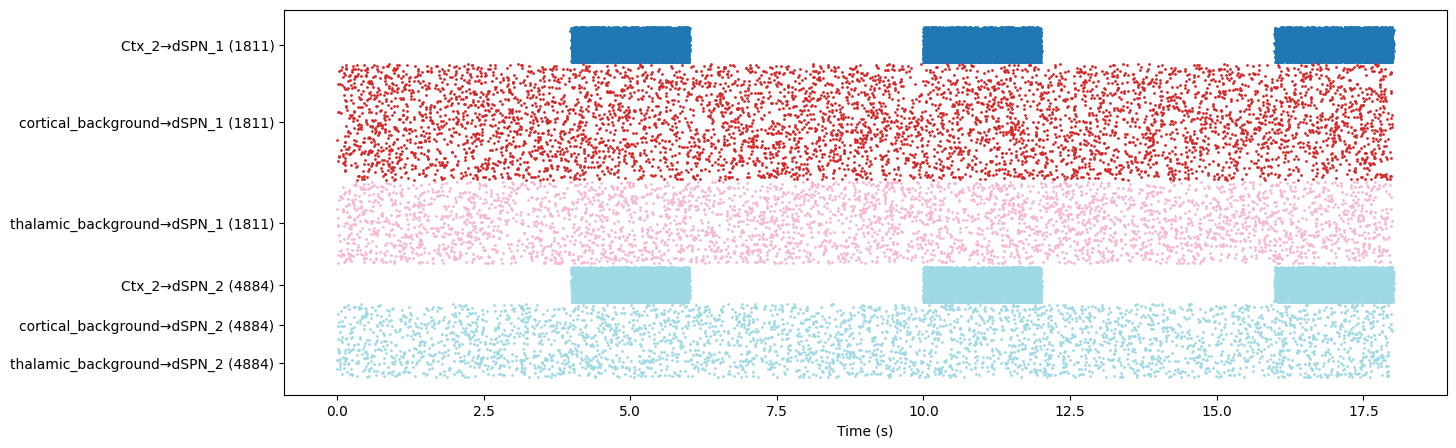

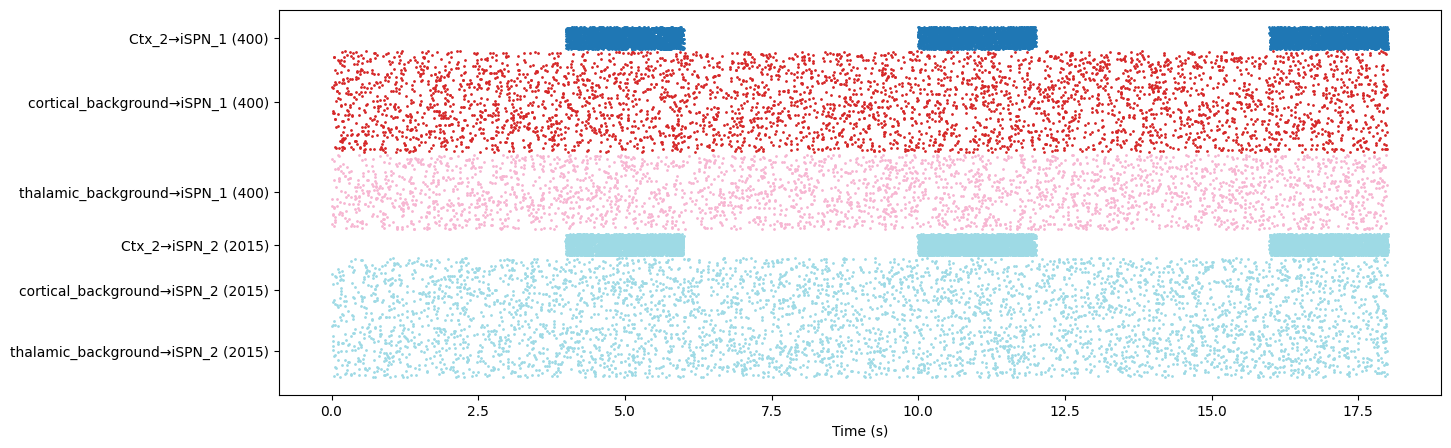

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
2: (dSPN_0, p1863c9a5, m9fda9b20)
6: (dSPN_0, pb0529fb9, mbb8e5b24)
8: (dSPN_0, pb0529fb9, m37886c78)
10: (dSPN_0, p7aa400d6, m37886c78)
144: (dSPN_1, p81757e87, mad2e6da1)
185: (dSPN_0, p1863c9a5, m9fda9b20)
189: (dSPN_0, p8bf90d1f, mf702205f)
192: (dSPN_0, pe6ec2d4b, m37886c78)
193: (dSPN_0, pb0529fb9, mbb8e5b24)
194: (dSPN_0, pe1ec8fbd, mbb8e5b24)
197: (dSPN_0, p1863c9a5, m9fda9b20)
225: (dSPN_1, p81757e87, mad2e6da1)
243: (dSPN_1, pdcbfd03a, mc44c4566)
251: (dSPN_1, p75cab3ca, m71f9efc2)
464: (iSPN_3, p57956f10, m1083058d)
488: (dSPN_0, p8bf90d1f, m9fda9b20)
500: (dSPN_2, p185b99a1, mdf60297d)
544: (dSPN_0, p7aa400d6, mc710c1a4)
549: (dSPN_0, p8bf90d1f, mf702205f)
550: (dSPN_0, pb0529fb9, mc710c1a4)
554: (dSPN_0, p8bf90d1f, mf702205f)
557: (dSPN_0, pb0529fb9, mbb8e5b24)
558: (dSPN_0, pb0529fb9, m9fda9b20)
559: (dSPN_0, 

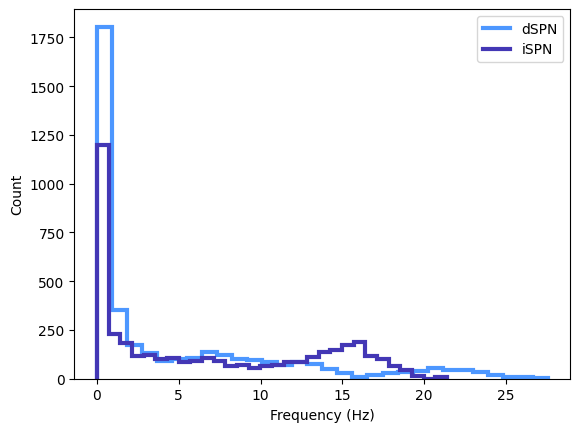

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


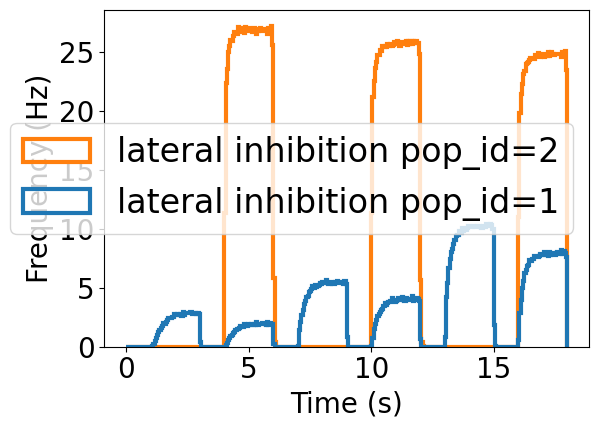

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
0: (dSPN_0, p7aa400d6, m22be6817)
1: (dSPN_0, pe1ec8fbd, mbb8e5b24)
5: (dSPN_0, p1863c9a5, mf702205f)
8: (dSPN_0, pb0529fb9, m37886c78)
15: (dSPN_0, p510bab86, m22be6817)
16: (dSPN_0, pe1ec8fbd, mbb8e5b24)
25: (dSPN_1, p81757e87, mc44c4566)
46: (dSPN_2, p185b99a1, m93f282f3)
62: (dSPN_3, p68dce107, m9dda78ad)
72: (iSPN_0, p581376d6, m6486ed26)
137: (dSPN_0, pb0529fb9, mf702205f)
140: (dSPN_0, p7aa400d6, mf702205f)
144: (dSPN_1, p81757e87, mad2e6da1)
189: (dSPN_0, p8bf90d1f, mf702205f)
193: (dSPN_0, pb0529fb9, mbb8e5b24)
197: (dSPN_0, p1863c9a5, m9fda9b20)
198: (dSPN_0, p8bf90d1f, m37886c78)
207: (dSPN_0, p1863c9a5, m9fda9b20)
210: (dSPN_0, pc8cbdb24, mf702205f)
225: (dSPN_1, p81757e87, mad2e6da1)
241: (dSPN_1, p81757e87, mad2e6da1)
261: (dSPN_1, p6c462b98, m80fca697)
287: (dSPN_2, p185b99a1, m93f282f3)
494: (dSPN_1, p81757e87

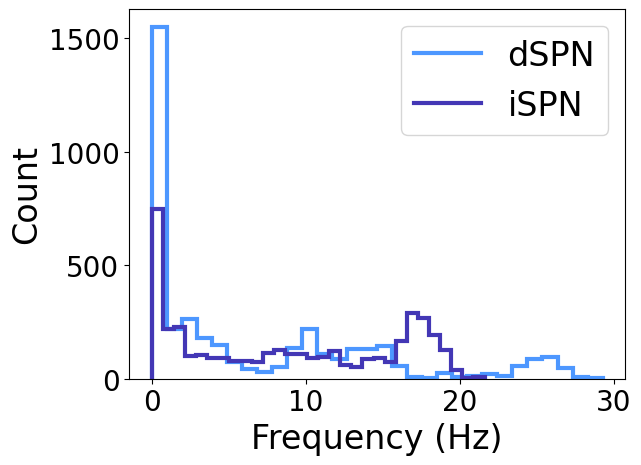

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


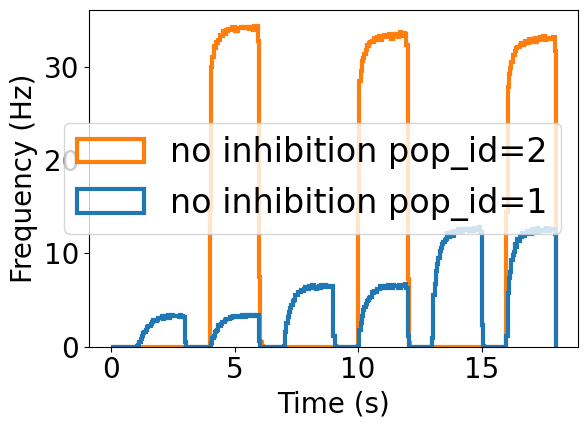

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


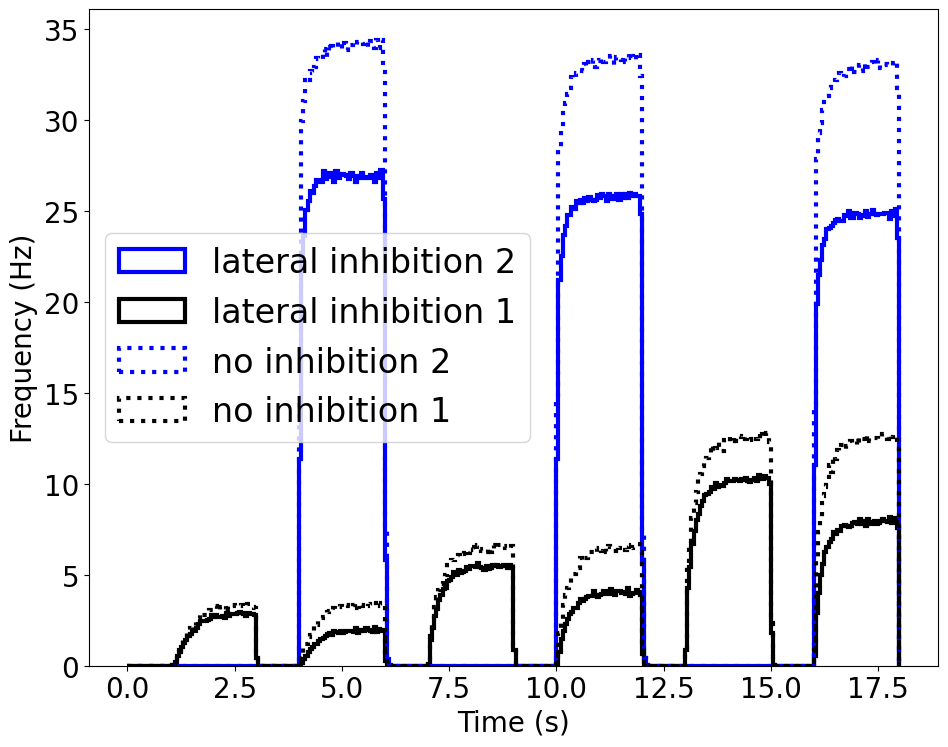

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8), colour=["black", "blue"])
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True, linestyle=":", colour=["black", "blue"])

In [13]:
time_ranges = [(2,3), (5,6), (8,9), (11,12), (14,15), (17,18)]

pop_id1 = spr.snudda_load.get_population_unit_members(population_unit=1)
pop_id2 = spr.snudda_load.get_population_unit_members(population_unit=2)

with_lat_freq_table1 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
with_lat_freq_table2 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)

no_lat_freq_table1 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
no_lat_freq_table2 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)



In [14]:
with_lat_freq1_mean = np.mean(with_lat_freq_table1, axis=0)
with_lat_freq2_mean = np.mean(with_lat_freq_table2, axis=0)
no_lat_freq1_mean = np.mean(no_lat_freq_table1, axis=0)
no_lat_freq2_mean = np.mean(no_lat_freq_table2, axis=0)

n1_cells = with_lat_freq_table1.shape[0]
n2_cells = with_lat_freq_table2.shape[0]

# Standard error of the mean
with_lat_freq1_std = np.std(with_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
with_lat_freq2_std = np.std(with_lat_freq_table2, axis=0) / np.sqrt(n2_cells)
no_lat_freq1_std = np.std(no_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
no_lat_freq2_std = np.std(no_lat_freq_table2, axis=0) / np.sqrt(n2_cells)

In [15]:
print("With lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(with_lat_freq1_mean, with_lat_freq1_std, with_lat_freq2_mean,with_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

With lateral inhibition
Freq 1: 2.80 +/- 0.09	Freq 2: 0.00 +/- 0.00
Freq 1: 1.93 +/- 0.07	Freq 2: 26.84 +/- 0.34
Freq 1: 5.45 +/- 0.14	Freq 2: 0.00 +/- 0.00
Freq 1: 4.02 +/- 0.12	Freq 2: 25.76 +/- 0.34
Freq 1: 10.22 +/- 0.20	Freq 2: 0.00 +/- 0.00
Freq 1: 7.91 +/- 0.18	Freq 2: 24.76 +/- 0.34


In [16]:
print("No lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(no_lat_freq1_mean, no_lat_freq1_std, no_lat_freq2_mean,no_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

No lateral inhibition
Freq 1: 3.23 +/- 0.10	Freq 2: 0.00 +/- 0.00
Freq 1: 3.32 +/- 0.10	Freq 2: 34.09 +/- 0.36
Freq 1: 6.46 +/- 0.16	Freq 2: 0.00 +/- 0.00
Freq 1: 6.45 +/- 0.16	Freq 2: 33.35 +/- 0.37
Freq 1: 12.54 +/- 0.22	Freq 2: 0.00 +/- 0.00
Freq 1: 12.49 +/- 0.22	Freq 2: 32.93 +/- 0.37


In [17]:
with_lat_n_firing1 = np.sum(with_lat_freq_table1 > 0, axis=0)
with_lat_n_firing2 = np.sum(with_lat_freq_table2 > 0, axis=0)

no_lat_n_firing1 = np.sum(no_lat_freq_table1 > 0, axis=0)
no_lat_n_firing2 = np.sum(no_lat_freq_table2 > 0, axis=0)

In [18]:
print("With lateral inhibition")
for n1_active, n2_active in zip(with_lat_n_firing1, with_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

With lateral inhibition
Neurons active 1: 1236/4000	Neurons active 2: 0/4000
Neurons active 1: 984/4000	Neurons active 2: 3319/4000
Neurons active 1: 1859/4000	Neurons active 2: 0/4000
Neurons active 1: 1483/4000	Neurons active 2: 3242/4000
Neurons active 1: 2549/4000	Neurons active 2: 0/4000
Neurons active 1: 2130/4000	Neurons active 2: 3150/4000


In [19]:
print("No lateral inhibition")
for n1_active, n2_active in zip(no_lat_n_firing1, no_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

No lateral inhibition
Neurons active 1: 1352/4000	Neurons active 2: 0/4000
Neurons active 1: 1388/4000	Neurons active 2: 3549/4000
Neurons active 1: 2111/4000	Neurons active 2: 0/4000
Neurons active 1: 2106/4000	Neurons active 2: 3468/4000
Neurons active 1: 2794/4000	Neurons active 2: 0/4000
Neurons active 1: 2763/4000	Neurons active 2: 3433/4000


In [20]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [21]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
2: (dSPN_0, p1863c9a5, m9fda9b20)
6: (dSPN_0, pb0529fb9, mbb8e5b24)
8: (dSPN_0, pb0529fb9, m37886c78)
10: (dSPN_0, p7aa400d6, m37886c78)
144: (dSPN_1, p81757e87, mad2e6da1)
185: (dSPN_0, p1863c9a5, m9fda9b20)
189: (dSPN_0, p8bf90d1f, mf702205f)
192: (dSPN_0, pe6ec2d4b, m37886c78)
193: (dSPN_0, pb0529fb9, mbb8e5b24)
194: (dSPN_0, pe1ec8fbd, mbb8e5b24)
197: (dSPN_0, p1863c9a5, m9fda9b20)
225: (dSPN_1, p81757e87, mad2e6da1)
243: (dSPN_1, pdcbfd03a, mc44c4566)
251: (dSPN_1, p75cab3ca, m71f9efc2)
464: (iSPN_3, p57956f10, m1083058d)
488: (dSPN_0, p8bf90d1f, m9fda9b20)
500: (dSPN_2, p185b99a1, mdf60297d)
544: (dSPN_0, p7aa400d6, mc710c1a4)
549: (dSPN_0, p8bf90d1f, mf702205f)
550: (dSPN_0, pb0529fb

In [22]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 3  4 13 14 18 19 21 23 24 26 28 29 30 33 35 38 39 40 43 44 45 47 52 56
 57 61 63 66 68 69]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


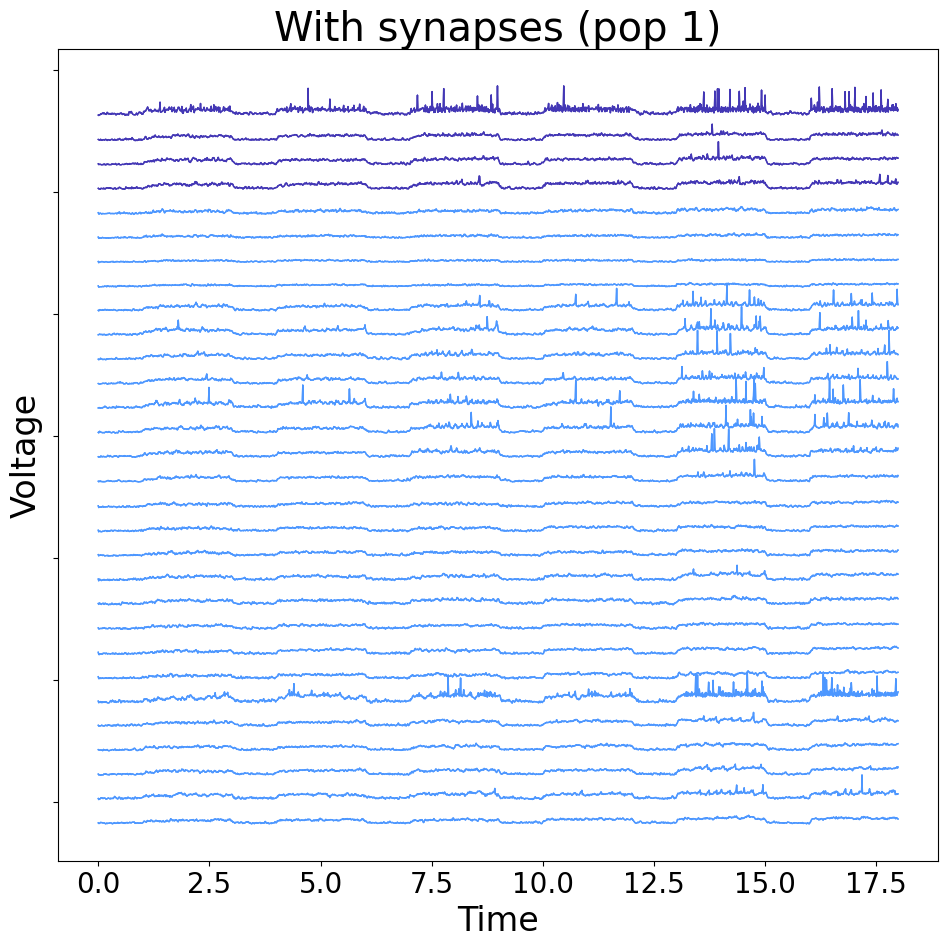

In [23]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [ 0  1  2  5  6  7  8  9 10 11 12 15 16 17 20 22 25 27 31 32 34 36 37 41
 42 46 48 49 50 51]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


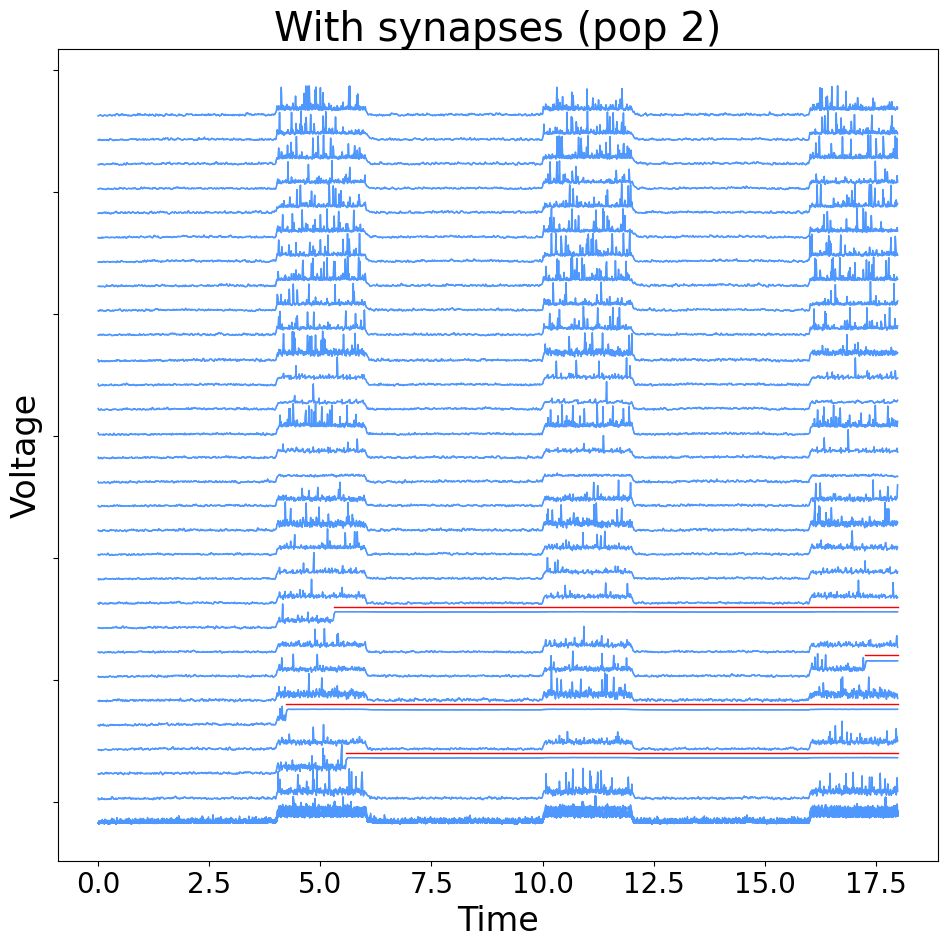

In [24]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [25]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
0: (dSPN_0, p7aa400d6, m22be6817)
1: (dSPN_0, pe1ec8fbd, mbb8e5b24)
5: (dSPN_0, p1863c9a5, mf702205f)
8: (dSPN_0, pb0529fb9, m37886c78)
15: (dSPN_0, p510bab86, m22be6817)
16: (dSPN_0, pe1ec8fbd, mbb8e5b24)
25: (dSPN_1, p81757e87, mc44c4566)
46: (dSPN_2, p185b99a1, m93f282f3)
62: (dSPN_3, p68dce107, m9dda78ad)
72: (iSPN_0, p581376d6, m6486ed26)
137: (dSPN_0, pb0529fb9, mf702205f)
140: (dSPN_0, p7aa400d6, mf702205f)
144: (dSPN_1, p81757e87, mad2e6da1)
189: (dSPN_0, p8bf90d1f, mf702205f)
193: (dSPN_0, pb0529fb9, mbb8e5b24)
197: (dSPN_0, p1863c9a5, m9fda9b20)
198: (dSPN_0, p8bf90d1f, m37886c78)
207: (dSPN_0, p1863c9a5, m9fda9b20)
210: (dSPN_0, pc8cbdb24, mf702205f)
225: (dSPN_1, p81757e87, mad2e6

In [26]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 3  4 13 14 18 19 21 23 24 26 28 29 30 33 35 38 39 40 43 44 45 47 52 56
 57 61 63 66 68 69]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


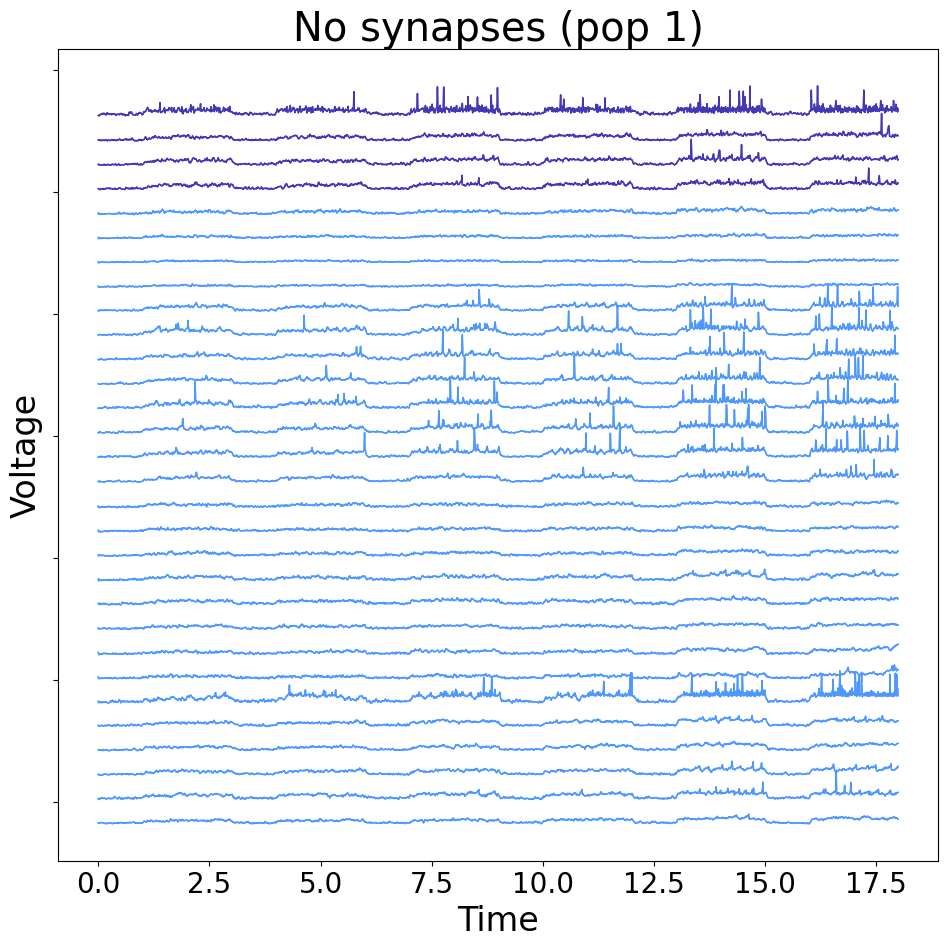

In [27]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [ 0  1  2  5  6  7  8  9 10 11 12 15 16 17 20 22 25 27 31 32 34 36 37 41
 42 46 48 49 50 51]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


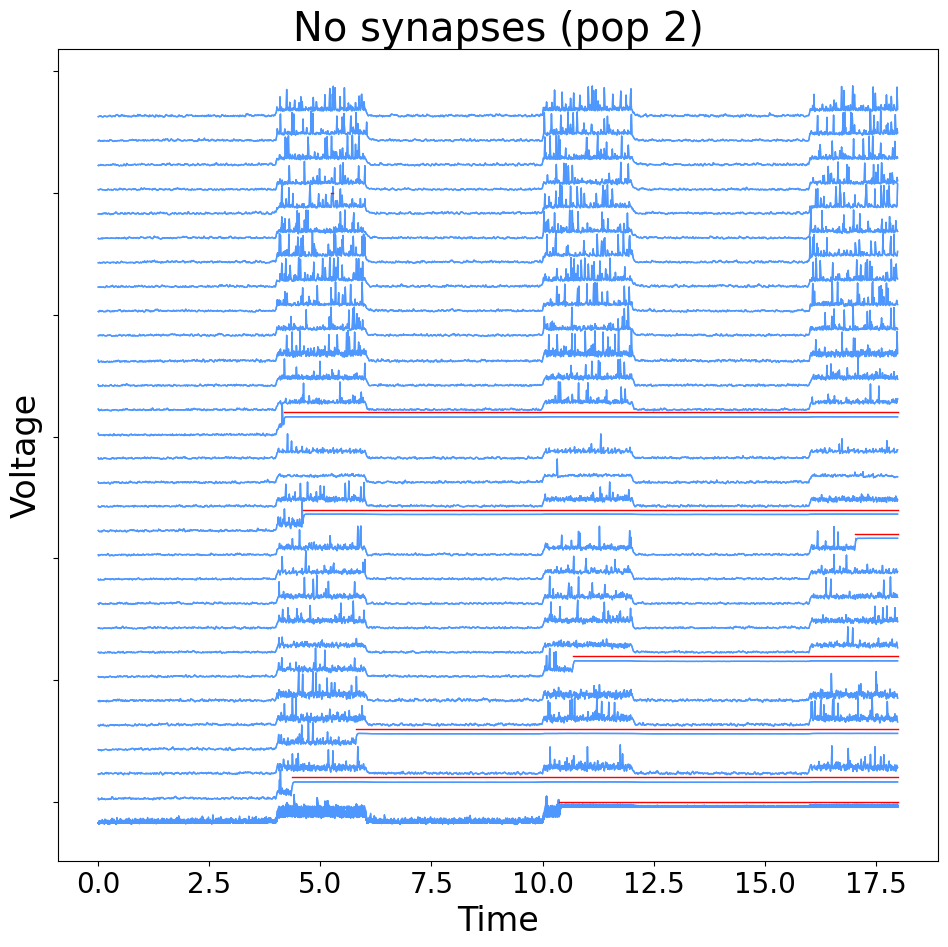

In [28]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [29]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [ 464  730  847 1007 1371 2290 3239 3309 3442 3775 5138 5381 6380 7833]
Plotted 14 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


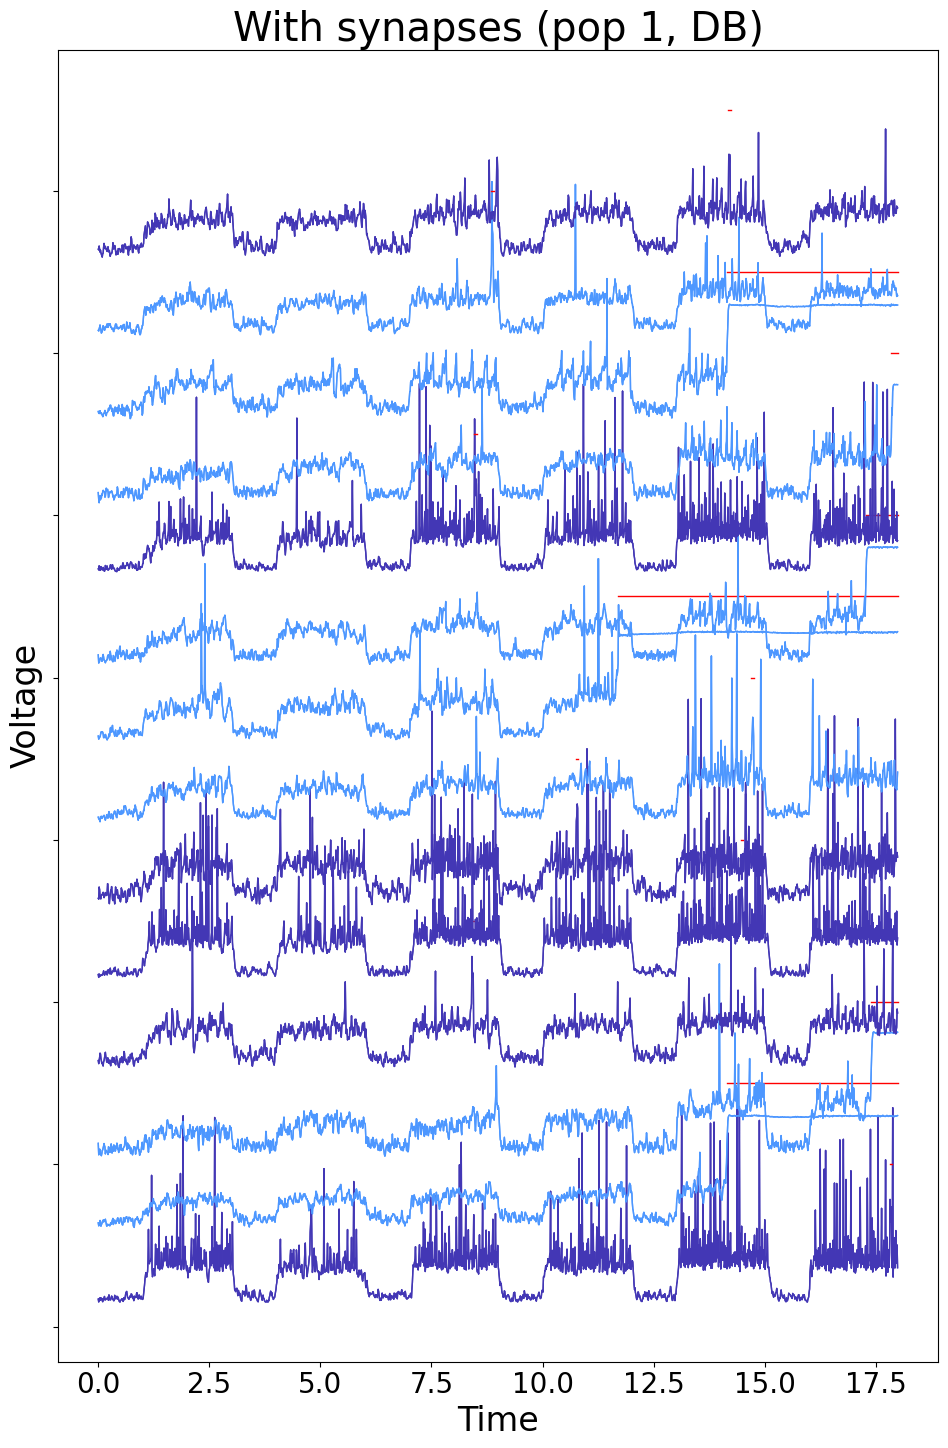

In [30]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [   2    6    8   10  144  185  189  192  193  194  197  225  243  251
  488  500  544  549  550  554  557  558  559  567  576  652  737  745
  837  846  904  909  911  920  993 1086 1090 1091 1094 1096 1098 1100
 1110 1133 1139 1222 1390 1395 1422 1424 1427 1559 1573 1748 1768 1773
 1790 1792 1794 1827 1935 1941 2057 2119 2122 2124 2137 2144 2153 2177
 2179 2186 2211 2278 2455 2456 2463 2469 2476 2573 2578 2581 2582 2595
 2640 2651 2656 2664 2670 2671 2967 2979 3016 3022 3023 3027 3072 3095
 3096 3124 3160 3199 3229 3233 3276 3277 3280 3282 3302 3386 3405 3435
 3451 3475 3480 3496 3543 3632 3780 3801 3807 3823 3829 3949 3965 4082
 4093 4102 4103 4108 4117 4182 4213 4272 4293 4438 4442 4456 4459 4469
 4477 4483 4496 4791 4794 4800 4810 4817 4831 4850 4872 5117 5132 5134
 5154 5165 5262 5351 5368 5374 5376 5378 5382 5398 5403 5454 5470 5597
 5625 5687 5708 5714 5716 5721 5727 5732 5738 5763 5774 5782 5942 6113
 6115 6142 6182 6185 6188 6190 6219 6245 6311 6317 6320 6328

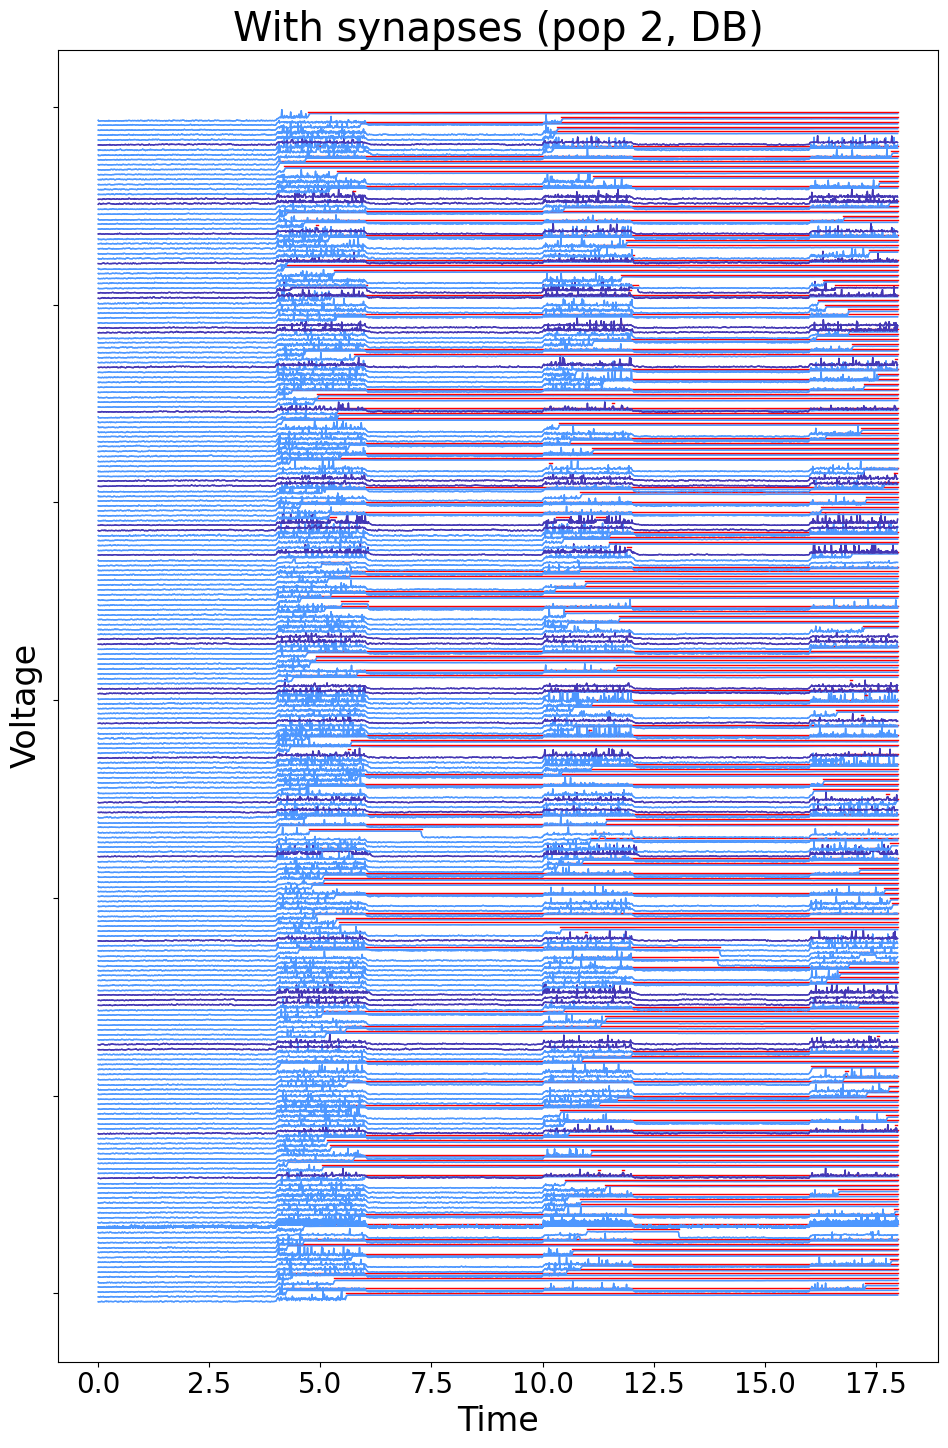

In [31]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [ 198  610  730  843 1007 1140 1159 1371 2304 2413 2782 3450 3876 4214
 4429 4856 5131 5210 5260 5476 5696 6184 6401 7045 7526 7574 7874]
Plotted 27 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


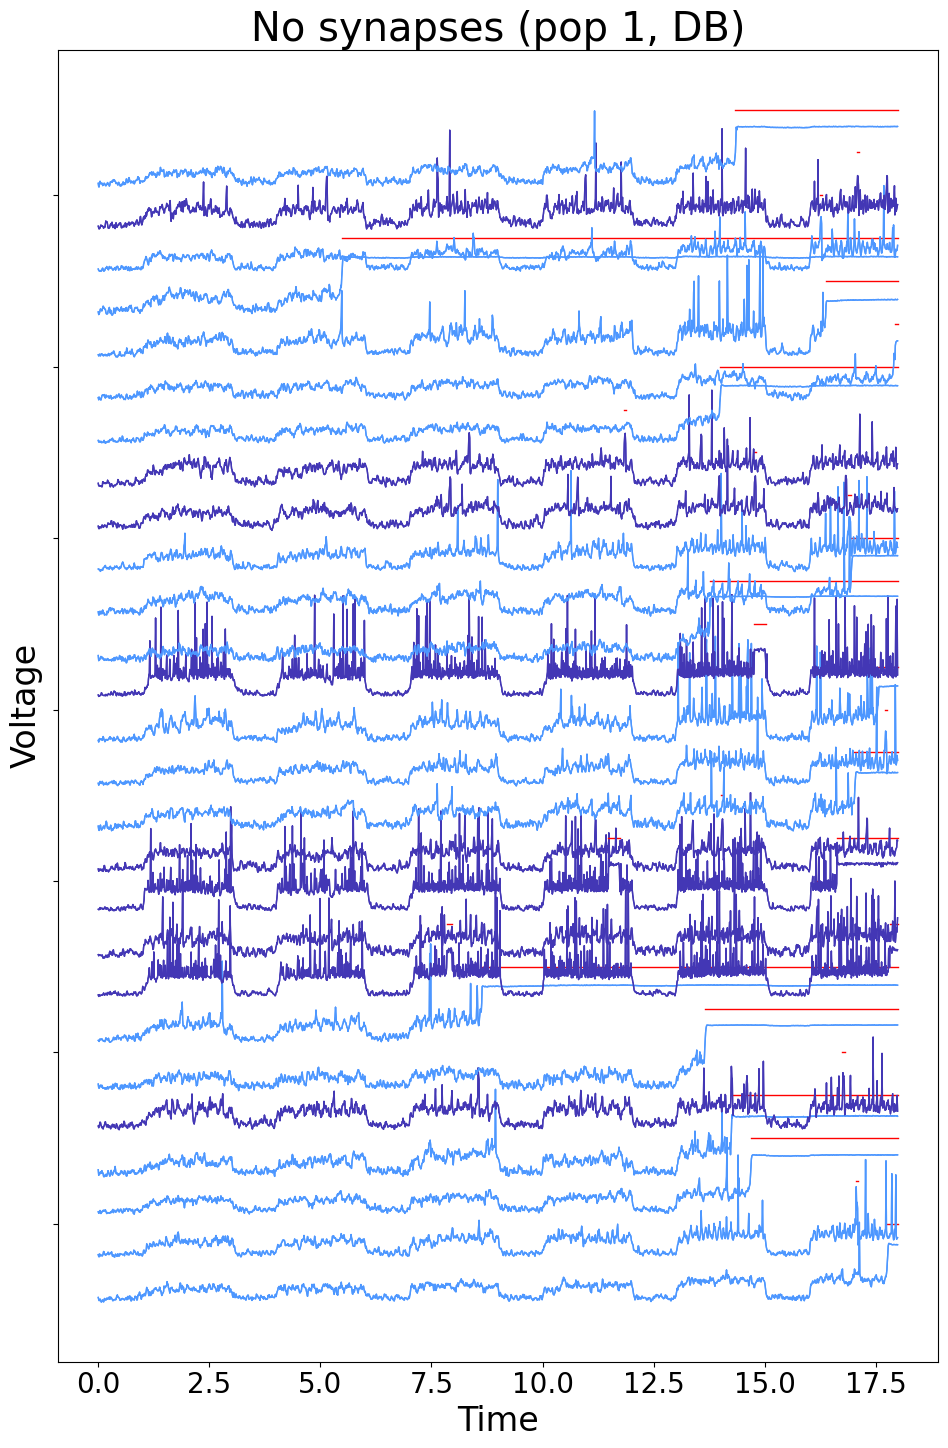

In [32]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [   0    1    5    8   15   16   25   46   62   72  137  140  144  189
  193  197  207  210  225  241  261  287  494  500  530  546  549  550
  554  557  558  560  564  576  737  749  835  839  846  899  908  909
  915  920  949  954  962  993 1001 1084 1086 1096 1098 1106 1110 1111
 1112 1138 1139 1145 1157 1166 1184 1242 1390 1395 1405 1416 1422 1427
 1431 1511 1542 1558 1578 1748 1750 1758 1766 1767 1769 1773 1782 1787
 1790 1792 1793 1794 1811 1848 1850 1859 1862 1866 1948 1961 2057 2099
 2100 2112 2127 2144 2167 2170 2182 2191 2410 2451 2455 2464 2571 2575
 2578 2583 2586 2595 2606 2609 2614 2640 2651 2670 2678 2751 2784 2967
 3016 3018 3030 3081 3095 3104 3160 3165 3233 3276 3277 3280 3282 3289
 3302 3316 3320 3386 3406 3432 3435 3441 3455 3467 3475 3477 3505 3521
 3643 3781 3783 3789 3796 3801 3804 3807 3816 3826 3829 3840 3865 3870
 3890 4055 4080 4081 4082 4083 4093 4101 4103 4108 4117 4162 4168 4174
 4183 4201 4205 4213 4268 4438 4444 4452 4454 4459 4469 4496

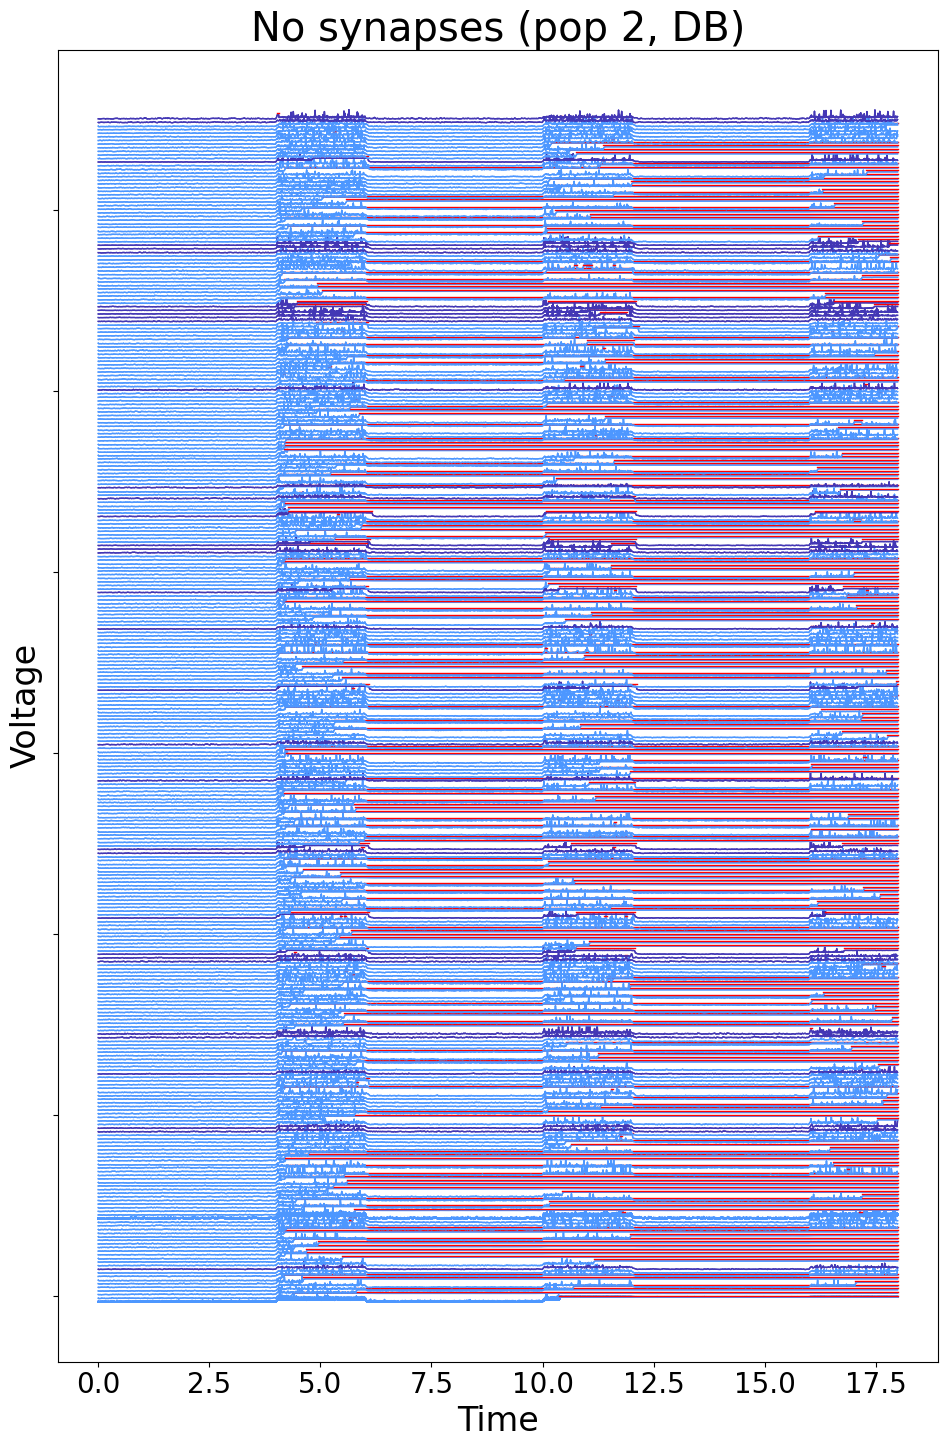

In [33]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)